In [17]:
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [18]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['axes.xmargin']=0
plt.rcParams['legend.fontsize'] = 14

In [19]:
out = Path("out")

fig_dir = Path("numerical_examples/rosenbrock/fig")
fig_dir.mkdir(exist_ok=True)

In [20]:
# ckpt = pickle.load(open(out / "mc_full_and_reduced_1.p", "rb"))
import pickle as pkl
import os

# Configuration
perturb_pct = 1000
input_dim = 20
latent_dim = 3
x_bounds = [(-2.5, 2.5)] * input_dim
batch_size = 10

results_dir = 'numerical_examples/rosenbrock/results'
val_results_file = os.path.join(results_dir, f'rosenbrock_{input_dim}d_{latent_dim}l_valid_theory.pkl')

with open(val_results_file, 'rb') as f:
  val_results_dict = pickle.load(f)

results_dir = 'numerical_examples/rosenbrock/results'
test_results_file = os.path.join(results_dir, f'rosenbrock_{input_dim}d_{latent_dim}l_v2.pkl')

with open(test_results_file, 'rb') as f:
  test_results_dict = pickle.load(f)

In [21]:
val_results_dict.keys()

dict_keys(['true_points', 'true_optima', 'glis_x_points', 'glis_x_values', 'glis_z_points', 'glis_z_values', 'glis_z_decoded_points'])

In [22]:
val_glis_x_best_values = np.array(val_results_dict['true_optima'])#.min(axis=1)
# val_glis_x_best_values = np.array(val_results_dict['glis_x_values']).min(axis=1)
val_glis_z_best_values = np.array(val_results_dict['glis_z_values']).min(axis=1)
test_glis_x_best_values = np.array(test_results_dict['true_optima'])#.min(axis=1)
# test_glis_x_best_values = np.array(test_results_dict['glis_x_values']).min(axis=1)
test_glis_z_best_values = np.array(test_results_dict['glis_z_values']).min(axis=1)

In [23]:
val_fit_full = val_glis_x_best_values
val_fit_red = val_glis_z_best_values
val_gap = ( val_glis_z_best_values - val_glis_x_best_values ) / (val_glis_x_best_values + 1e-6) * 100

test_fit_full = test_glis_x_best_values
test_fit_red = test_glis_z_best_values
test_gap = ( test_glis_z_best_values - test_glis_x_best_values ) / (test_glis_x_best_values + 1e-6) * 100

(-50.0, 100.0)

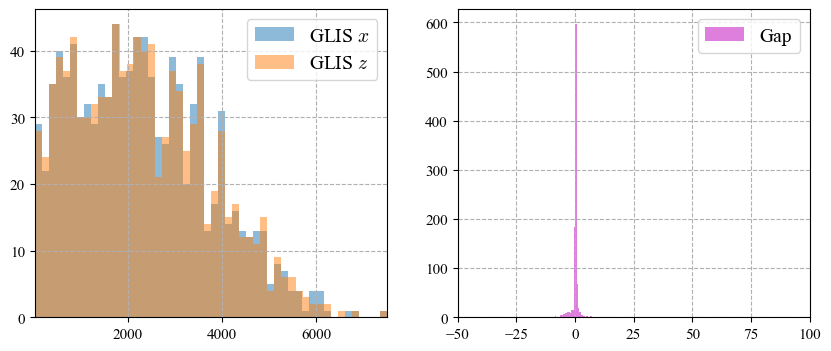

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(val_fit_full, alpha=0.5, label="GLIS $x$", color="C0", bins=50)
ax[0].hist(val_fit_red, alpha=0.5, label="GLIS $z$", color="C1", bins=50)
ax[0].legend()
ax[1].hist(val_gap, bins=100, alpha=0.5, label="Gap", color="m");
ax[1].legend();
ax[1].set_xlim([-50,100])

## Bound computations

In [25]:
m = val_gap.shape[0] # number of mc realizations
#m = 1800
delta = 0.05
alpha = 0.1
eps_m = np.sqrt(np.log(2/delta)/(2*m))
quant = 1 - alpha + eps_m; quant

0.9429469408346738

In [26]:
q_idx = int(quant * m); q_idx

942

In [27]:
sorted_gap = np.sort(val_gap)
bound = sorted_gap[q_idx]

In [28]:
test_q = np.quantile(test_gap, 1-alpha); test_q

0.6807006940331272

In [29]:
## Bound visualization

In [30]:
alpha

0.1

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


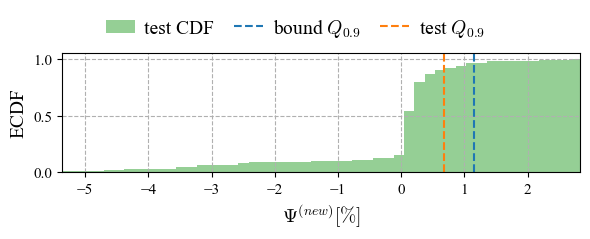

In [31]:
import matplotlib.pyplot as plt
import os
import numpy as np

def sci_fmt(x):
    """Format numbers as a * 10^n in LaTeX math mode."""
    exp = int(np.floor(np.log10(x)))
    coeff = x / 10**exp
    return rf"{coeff:.1f}\cdot 10^{{{exp}}}"

plt.figure(figsize=(6,3))

# empirical CDF
plt.hist(
    test_gap, bins=50, cumulative=True, density=True,
    color="tab:green", alpha=0.5, label="test CDF"
)

# compute CDF values at bounds
cdf_bound = (test_gap < bound).sum() / len(test_gap)
cdf_testq = (test_gap < test_q).sum() / len(test_gap)
# quantile bounds with scientific notation
# quantile bounds with numeric 1-alpha
plt.axvline(bound, color='tab:blue', linestyle='--',
            label=rf"bound $Q_{{{1-alpha:.1f}}}$")
plt.axvline(test_q, color='tab:orange', linestyle='--',
            label=rf"test $Q_{{{1-alpha:.1f}}}$")

# corresponding horizontal lines
# plt.axhline((test_gap < bound).sum() / 100, color='tab:blue', linestyle='--')
# plt.axhline((test_gap < test_q).sum() / 100, color='tab:orange', linestyle='--')
# annotate instead of horizontal lines
# plt.text(bound, cdf_testq,
#          rf"${cdf_bound:.2f}$",
#          color='tab:blue', fontsize=10, ha='left', va='bottom', rotation=0)
#
# plt.text(test_q, cdf_testq,
#          rf"${cdf_testq:.2f}$",
#          color='tab:orange', fontsize=10, ha='left', va='bottom', rotation=0)

# axis labels
plt.xlabel('$\Psi^{(new)} [\%]$')
plt.ylabel('ECDF')

# logarithmic x-axis
# plt.xscale("log")

# compact legend
plt.legend(
    ncol=3,
    handlelength=1.5,
    handletextpad=0.5,
    columnspacing=1.0,
    loc="upper center",
    bbox_to_anchor=(0.45, 1.45),
    frameon=False
)

plt.tight_layout()
plt.savefig(os.path.join(fig_dir, "cdf_bound_pso_meta.pdf"))
plt.show()


In [33]:
test_q

0.6807006940331272